In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul( img.reshape((-1,3)), M.T ).reshape(img.shape)

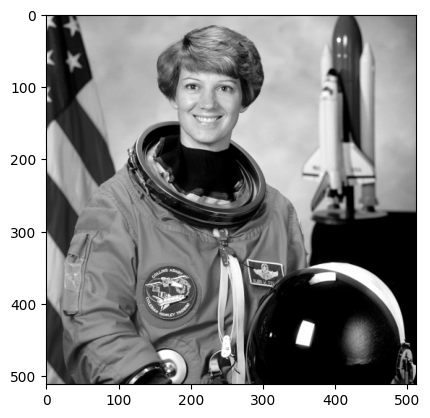

In [3]:
img_rgb = iio.imread('imageio:astronaut.png') / 255
plt.imshow(img_rgb)

img_YIQ = apply_matrix(img_rgb, MAT_RGB2YIQ)
canal_Y = img_YIQ[:,:,0]

plt.imshow(canal_Y, 'gray')



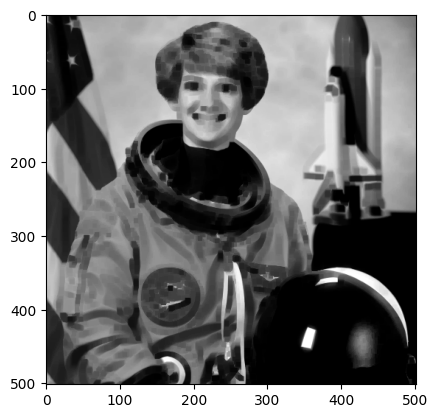

In [11]:
def erosion(imagen):
    filas,columnas=imagen.shape
    output=np.empty((filas,columnas))
    for i in range(1,filas-1):
        for j in range(1,columnas-1):
            entorno = imagen[i-1:i+2,j-1:j+2] #Ojo cuando vean el video de la clase que en vivo puse i+1 y j+1 y quedó 2x2 el entorno
            minimo = np.min(entorno.flatten())
            output[i,j]=minimo
    output=output[1:filas-1,1:columnas-1]
    return(output)

def dilatacion(imagen):
    filas,columnas=imagen.shape
    output=np.empty((filas,columnas))
    for i in range(1,filas-1):
        for j in range(1,columnas-1):
            entorno = imagen[i-1:i+2,j-1:j+2] #Ojo cuando vean el video de la clase que en vivo había puesto i+1 y j+1 y quedó 2x2 el entorno
            maximo = np.max(entorno.flatten())
            output[i,j]=maximo
    output=output[1:filas-1,1:columnas-1]
    return(output)


plt.imshow(erosion(canal_Y),"gray")

foto=canal_Y
for i in range(5):
    foto=erosion(foto)

plt.imshow(foto,"gray")

foto=canal_Y
for i in range(5):
    foto=erosion(foto)

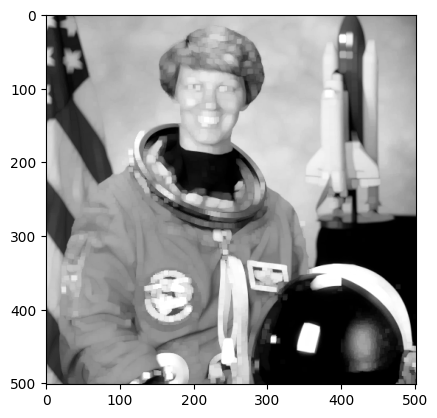

In [20]:
foto=canal_Y
for i in range(5):
    foto=dilatacion(foto)
plt.imshow(foto,"gray")   


def dilatacion(imagen):
    filas,columnas=imagen.shape
    output=np.empty((filas,columnas))
    for i in range(1,filas-1):
        for j in range(1,columnas-1):
            entorno = imagen[i-1:i+2,j-1:j+2]
            maximo = np.max(entorno.flatten())
            output[i,j]=maximo
    output=output[1:filas-1,1:columnas-1]
    return(output)

[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0. -1.  0.]]


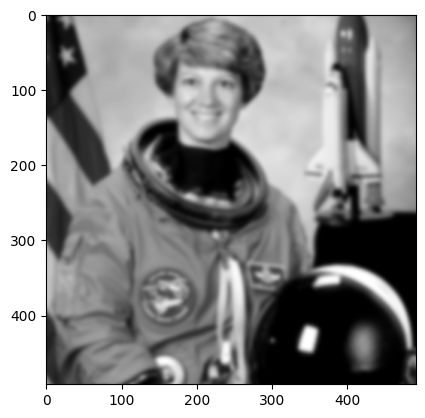

In [23]:
def convolucion(imagen,kernel):
    filas,columnas=imagen.shape
    output = np.empty(imagen.shape)
    for i in range(1,filas-1):
        for j in range(1,columnas-1):
            entorno = imagen[(i-1):(i+2),(j-1):(j+2)] #Ojo cuando vean el video de la clase que en vivo puse i+1 y j+1 y quedó 2x2 el entorno
            #print(entorno.shape)
            #print(kernel.shape)
            producto = entorno * kernel
            suma = np.sum(producto)
            output[i,j]=suma
    output=output[1:filas-1,1:columnas-1]       
    return(output) 
       
foto=canal_Y
for i in range(10):
    foto=convolucion(foto,np.ones((3,3))/9.)

plt.imshow(foto,"gray")    

[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0. -1.  0.]]


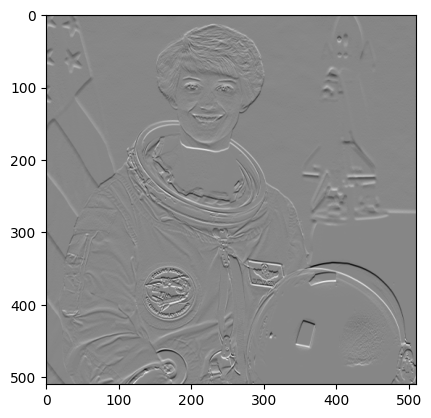

In [27]:
kernel= np.zeros((3,3))
kernel[0,1]=1
kernel[2,1]=-1
print(kernel)

foto=canal_Y
foto=convolucion(foto,kernel)
plt.imshow(foto,"gray")    